In [129]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score

In [135]:
nba_data = pd.read_csv('../data/final_nba.csv')

In [136]:
nba_data.drop(columns='Unnamed: 0',inplace=True)

In [137]:
nba_data

,name,player_id,age,season,team,MP,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,FG%,Avg_shot_dist,%_2point_attempts,%_FGA_0-3_dist,%_FGA_3-10_dist,%_FGA_10-16_dist,%_FGA_16-3pt_dist,%_3point_attempts,%FG_2point,%_FG_0-3_dist,%_FG_3-10_dist,%_FG_10-16_dist,%_FG_10-16_dist.1,3pt%,assisted_2pters,FG%_dunk_attempts,made_dunks,assisted_3pt%,%_corner_3pters,%_corner_3_made,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,predator_offense,predator_defense,predator_total,pace_impact
0,Bam Adebayo,adebaba01,22,2020,MIA,1865,0.473,8.8,24.2,16.8,22.5,1.8,3.4,17.2,19.9,4.1,3.0,7.1,0.183,0.578,5.7,0.980,0.480,0.307,0.147,0.046,0.020,0.588,0.746,0.462,0.438,0.250,0.083,0.711,0.234,130,1.000,0.667,0.125,-0.795731,2.169670,1.373940,3.506720,0.822734,4.329454,0.014715,1.999088,2.013802,4.648078,4.648078,-0.105324,1.108234,1.002910,-0.772876
1,LaMarcus Aldridge,aldrila01,34,2020,SAS,1661,0.245,6.4,18.1,12.2,11.3,0.9,4.3,7.9,23.3,3.3,1.3,4.6,0.133,0.495,13.7,0.801,0.203,0.129,0.226,0.244,0.199,0.520,0.712,0.475,0.460,0.441,0.392,0.558,0.042,29,0.950,0.183,0.393,-0.407140,0.526252,0.119112,-0.787673,-2.229078,-3.016751,-0.553316,0.024159,-0.529156,1.894905,1.894905,-0.516605,0.485455,-0.031150,-1.422240
2,Nickeil Alexander-Walker,alexani01,21,2020,NOP,501,0.123,1.7,15.3,8.4,20.5,1.0,1.2,14.3,22.9,-0.7,0.3,-0.4,-0.038,0.339,16.3,0.485,0.229,0.172,0.057,0.026,0.515,0.336,0.462,0.205,0.231,0.333,0.342,0.135,0.004,1,0.900,0.188,0.364,-3.090773,-1.731435,-4.822207,0.635783,-3.760455,-3.124671,-2.515123,-2.224647,-4.739770,-0.511053,-0.511053,-0.909961,-2.290986,-3.200948,0.490942
3,Grayson Allen,allengr01,24,2020,MEM,498,0.199,1.1,12.7,7.0,11.7,0.6,0.2,10.7,18.0,0.5,0.2,0.7,0.065,0.449,15.7,0.483,0.188,0.199,0.091,0.006,0.517,0.541,0.758,0.400,0.438,0.000,0.363,0.587,0.063,10,0.970,0.275,0.480,-0.156312,-1.571262,-1.727574,-1.034276,-3.017205,-4.051481,-0.329295,-1.954804,-2.284099,0.118917,0.118917,-0.632824,-2.583428,-3.216252,0.466596
4,Kyle Anderson,anderky01,26,2020,MEM,868,0.254,5.6,18.4,12.1,15.4,1.9,2.4,14.8,13.4,0.7,1.0,1.7,0.096,0.504,10.7,0.799,0.317,0.237,0.129,0.116,0.201,0.575,0.648,0.604,0.448,0.462,0.222,0.534,0.040,9,1.000,0.644,0.172,-0.664942,1.772078,1.107136,-6.238171,2.352928,-3.885243,-1.841386,2.015370,0.173984,1.363175,1.363175,-2.512889,1.281543,-1.231346,0.085884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,Christian Wood,woodch01,24,2020,DET,1013,0.508,8.6,25.3,16.9,6.9,1.2,3.7,11.9,21.9,2.8,1.2,4.0,0.187,0.562,11.4,0.712,0.407,0.219,0.033,0.053,0.288,0.636,0.800,0.419,0.308,0.476,0.381,0.702,0.247,89,0.907,0.283,0.375,1.201009,2.687525,3.888534,2.049796,2.506545,4.556341,1.470918,2.874558,4.345477,3.769059,3.769059,1.233359,1.279606,2.512965,0.112258
490,Delon Wright,wrighde01,27,2020,DAL,1116,0.252,5.5,13.4,9.5,22.0,2.4,1.4,12.4,15.2,2.3,1.2,3.5,0.151,0.472,10.8,0.704,0.373,0.272,0.034,0.025,0.296,0.513,0.645,0.364,0.455,0.250,0.375,0.282,0.019,5,0.806,0.156,0.533,1.725728,0.022286,1.748014,-1.689045,-0.654908,-2.343953,1.064362,-0.121982,0.942380,2.184139,2.184139,1.000805,-0.049582,0.951223,-0.837801
491,Thaddeus Young,youngth01,31,2020,CHI,1296,0.120,6.1,15.8,10.8,11.0,2.4,1.2,14.4,19.7,-0.5,1.6,1.2,0.043,0.449,11.9,0.636,0.331,0.254,0.019,0.032,0.364,0.497,0.594,0.418,0.100,0.353,0.365,0.587,0.049,23,0.929,0.443,0.353,-2.698887,1.002217,-1.696670,-4.052740,0.611666,-3.441073,-3.081703,0.955130,-2.126572,0.435915,0.435915,-3.041606,1.113662,-1.927944,0.560568
492,Trae Young,youngtr01,21,2020,ATL,1760,0.444,1.8,11.8,6.7,45.9,1.5,0.2,16.4,35.0,4.5,0.5,5.1,0.138,0.445,16.7,0.545,0.184,0.167,0.145,0.048,0.455,0.504,0.598,0.459,0.471,0.404,0.374,0.165,0.000,0,0.283,0.033,0.625,6.415434,-2.595577,3.81

In [138]:
nba_no_dups = nba_data.drop_duplicates(subset='name')

In [139]:
nba_no_dups

,name,player_id,age,season,team,MP,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,FG%,Avg_shot_dist,%_2point_attempts,%_FGA_0-3_dist,%_FGA_3-10_dist,%_FGA_10-16_dist,%_FGA_16-3pt_dist,%_3point_attempts,%FG_2point,%_FG_0-3_dist,%_FG_3-10_dist,%_FG_10-16_dist,%_FG_10-16_dist.1,3pt%,assisted_2pters,FG%_dunk_attempts,made_dunks,assisted_3pt%,%_corner_3pters,%_corner_3_made,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,predator_offense,predator_defense,predator_total,pace_impact
0,Bam Adebayo,adebaba01,22,2020,MIA,1865,0.473,8.8,24.2,16.8,22.5,1.8,3.4,17.2,19.9,4.1,3.0,7.1,0.183,0.578,5.7,0.980,0.480,0.307,0.147,0.046,0.020,0.588,0.746,0.462,0.438,0.250,0.083,0.711,0.234,130,1.000,0.667,0.125,-0.795731,2.169670,1.373940,3.506720,0.822734,4.329454,0.014715,1.999088,2.013802,4.648078,4.648078,-0.105324,1.108234,1.002910,-0.772876
1,LaMarcus Aldridge,aldrila01,34,2020,SAS,1661,0.245,6.4,18.1,12.2,11.3,0.9,4.3,7.9,23.3,3.3,1.3,4.6,0.133,0.495,13.7,0.801,0.203,0.129,0.226,0.244,0.199,0.520,0.712,0.475,0.460,0.441,0.392,0.558,0.042,29,0.950,0.183,0.393,-0.407140,0.526252,0.119112,-0.787673,-2.229078,-3.016751,-0.553316,0.024159,-0.529156,1.894905,1.894905,-0.516605,0.485455,-0.031150,-1.422240
2,Nickeil Alexander-Walker,alexani01,21,2020,NOP,501,0.123,1.7,15.3,8.4,20.5,1.0,1.2,14.3,22.9,-0.7,0.3,-0.4,-0.038,0.339,16.3,0.485,0.229,0.172,0.057,0.026,0.515,0.336,0.462,0.205,0.231,0.333,0.342,0.135,0.004,1,0.900,0.188,0.364,-3.090773,-1.731435,-4.822207,0.635783,-3.760455,-3.124671,-2.515123,-2.224647,-4.739770,-0.511053,-0.511053,-0.909961,-2.290986,-3.200948,0.490942
3,Grayson Allen,allengr01,24,2020,MEM,498,0.199,1.1,12.7,7.0,11.7,0.6,0.2,10.7,18.0,0.5,0.2,0.7,0.065,0.449,15.7,0.483,0.188,0.199,0.091,0.006,0.517,0.541,0.758,0.400,0.438,0.000,0.363,0.587,0.063,10,0.970,0.275,0.480,-0.156312,-1.571262,-1.727574,-1.034276,-3.017205,-4.051481,-0.329295,-1.954804,-2.284099,0.118917,0.118917,-0.632824,-2.583428,-3.216252,0.466596
4,Kyle Anderson,anderky01,26,2020,MEM,868,0.254,5.6,18.4,12.1,15.4,1.9,2.4,14.8,13.4,0.7,1.0,1.7,0.096,0.504,10.7,0.799,0.317,0.237,0.129,0.116,0.201,0.575,0.648,0.604,0.448,0.462,0.222,0.534,0.040,9,1.000,0.644,0.172,-0.664942,1.772078,1.107136,-6.238171,2.352928,-3.885243,-1.841386,2.015370,0.173984,1.363175,1.363175,-2.512889,1.281543,-1.231346,0.085884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,Christian Wood,woodch01,24,2020,DET,1013,0.508,8.6,25.3,16.9,6.9,1.2,3.7,11.9,21.9,2.8,1.2,4.0,0.187,0.562,11.4,0.712,0.407,0.219,0.033,0.053,0.288,0.636,0.800,0.419,0.308,0.476,0.381,0.702,0.247,89,0.907,0.283,0.375,1.201009,2.687525,3.888534,2.049796,2.506545,4.556341,1.470918,2.874558,4.345477,3.769059,3.769059,1.233359,1.279606,2.512965,0.112258
490,Delon Wright,wrighde01,27,2020,DAL,1116,0.252,5.5,13.4,9.5,22.0,2.4,1.4,12.4,15.2,2.3,1.2,3.5,0.151,0.472,10.8,0.704,0.373,0.272,0.034,0.025,0.296,0.513,0.645,0.364,0.455,0.250,0.375,0.282,0.019,5,0.806,0.156,0.533,1.725728,0.022286,1.748014,-1.689045,-0.654908,-2.343953,1.064362,-0.121982,0.942380,2.184139,2.184139,1.000805,-0.049582,0.951223,-0.837801
491,Thaddeus Young,youngth01,31,2020,CHI,1296,0.120,6.1,15.8,10.8,11.0,2.4,1.2,14.4,19.7,-0.5,1.6,1.2,0.043,0.449,11.9,0.636,0.331,0.254,0.019,0.032,0.364,0.497,0.594,0.418,0.100,0.353,0.365,0.587,0.049,23,0.929,0.443,0.353,-2.698887,1.002217,-1.696670,-4.052740,0.611666,-3.441073,-3.081703,0.955130,-2.126572,0.435915,0.435915,-3.041606,1.113662,-1.927944,0.560568
492,Trae Young,youngtr01,21,2020,ATL,1760,0.444,1.8,11.8,6.7,45.9,1.5,0.2,16.4,35.0,4.5,0.5,5.1,0.138,0.445,16.7,0.545,0.184,0.167,0.145,0.048,0.455,0.504,0.598,0.459,0.471,0.404,0.374,0.165,0.000,0,0.283,0.033,0.625,6.415434,-2.595577,3.81

In [15]:
stats_ony = nba_data.drop(columns=['name','player_id','age','season','MP','team'])

In [140]:
stats_ony_no_dups = nba_no_dups.drop(columns=['name','player_id','age','season','MP','team','OWS','DWS','WS','WS/48'])

In [141]:
stats_ony_no_dups

,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,FG%,Avg_shot_dist,%_2point_attempts,%_FGA_0-3_dist,%_FGA_3-10_dist,%_FGA_10-16_dist,%_FGA_16-3pt_dist,%_3point_attempts,%FG_2point,%_FG_0-3_dist,%_FG_3-10_dist,%_FG_10-16_dist,%_FG_10-16_dist.1,3pt%,assisted_2pters,FG%_dunk_attempts,made_dunks,assisted_3pt%,%_corner_3pters,%_corner_3_made,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,predator_offense,predator_defense,predator_total,pace_impact
0,0.473,8.8,24.2,16.8,22.5,1.8,3.4,17.2,19.9,0.578,5.7,0.980,0.480,0.307,0.147,0.046,0.020,0.588,0.746,0.462,0.438,0.250,0.083,0.711,0.234,130,1.000,0.667,0.125,-0.795731,2.169670,1.373940,3.506720,0.822734,4.329454,0.014715,1.999088,2.013802,4.648078,4.648078,-0.105324,1.108234,1.002910,-0.772876
1,0.245,6.4,18.1,12.2,11.3,0.9,4.3,7.9,23.3,0.495,13.7,0.801,0.203,0.129,0.226,0.244,0.199,0.520,0.712,0.475,0.460,0.441,0.392,0.558,0.042,29,0.950,0.183,0.393,-0.407140,0.526252,0.119112,-0.787673,-2.229078,-3.016751,-0.553316,0.024159,-0.529156,1.894905,1.894905,-0.516605,0.485455,-0.031150,-1.422240
2,0.123,1.7,15.3,8.4,20.5,1.0,1.2,14.3,22.9,0.339,16.3,0.485,0.229,0.172,0.057,0.026,0.515,0.336,0.462,0.205,0.231,0.333,0.342,0.135,0.004,1,0.900,0.188,0.364,-3.090773,-1.731435,-4.822207,0.635783,-3.760455,-3.124671,-2.515123,-2.224647,-4.739770,-0.511053,-0.511053,-0.909961,-2.290986,-3.200948,0.490942
3,0.199,1.1,12.7,7.0,11.7,0.6,0.2,10.7,18.0,0.449,15.7,0.483,0.188,0.199,0.091,0.006,0.517,0.541,0.758,0.400,0.438,0.000,0.363,0.587,0.063,10,0.970,0.275,0.480,-0.156312,-1.571262,-1.727574,-1.034276,-3.017205,-4.051481,-0.329295,-1.954804,-2.284099,0.118917,0.118917,-0.632824,-2.583428,-3.216252,0.466596
4,0.254,5.6,18.4,12.1,15.4,1.9,2.4,14.8,13.4,0.504,10.7,0.799,0.317,0.237,0.129,0.116,0.201,0.575,0.648,0.604,0.448,0.462,0.222,0.534,0.040,9,1.000,0.644,0.172,-0.664942,1.772078,1.107136,-6.238171,2.352928,-3.885243,-1.841386,2.015370,0.173984,1.363175,1.363175,-2.512889,1.281543,-1.231346,0.085884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,0.508,8.6,25.3,16.9,6.9,1.2,3.7,11.9,21.9,0.562,11.4,0.712,0.407,0.219,0.033,0.053,0.288,0.636,0.800,0.419,0.308,0.476,0.381,0.702,0.247,89,0.907,0.283,0.375,1.201009,2.687525,3.888534,2.049796,2.506545,4.556341,1.470918,2.874558,4.345477,3.769059,3.769059,1.233359,1.279606,2.512965,0.112258
490,0.252,5.5,13.4,9.5,22.0,2.4,1.4,12.4,15.2,0.472,10.8,0.704,0.373,0.272,0.034,0.025,0.296,0.513,0.645,0.364,0.455,0.250,0.375,0.282,0.019,5,0.806,0.156,0.533,1.725728,0.022286,1.748014,-1.689045,-0.654908,-2.343953,1.064362,-0.121982,0.942380,2.184139,2.184139,1.000805,-0.049582,0.951223,-0.837801
491,0.120,6.1,15.8,10.8,11.0,2.4,1.2,14.4,19.7,0.449,11.9,0.636,0.331,0.254,0.019,0.032,0.364,0.497,0.594,0.418,0.100,0.353,0.365,0.587,0.049,23,0.929,0.443,0.353,-2.698887,1.002217,-1.696670,-4.052740,0.611666,-3.441073,-3.081703,0.955130,-2.126572,0.435915,0.435915,-3.041606,1.113662,-1.927944,0.560568
492,0.444,1.8,11.8,6.7,45.9,1.5,0.2,16.4,35.0,0.445,16.7,0.545,0.184,0.167,0.145,0.048,0.455,0.504,0.598,0.459,0.471,0.404,0.374,0.165,0.000,0,0.283,0.033,0.625,6.415434,-2.595577,3.819856,8.640753,-5.339819,3.300934,7.447487,-3.271294,4.176193,6.684782,6.684782,8.333820,-3.600605,4.733215,2.866609


In [131]:
scaler_min_max = MinMaxScaler(feature_range=[0, 1])

In [91]:
data_rescaled = scaler_min_max.fit_transform(stats_ony)

In [143]:
no_dups_rescaled = scaler_min_max.fit_transform(stats_ony_no_dups)

In [92]:
data_rescaled_X

array([[0.68364198, 0.50909091, 0.59090909, ..., 0.55483396, 0.24597559,
        0.55555556],
       [0.33179012, 0.36363636, 0.40606061, ..., 0.50808063, 0.12776297,
        0.66666667],
       [0.14351852, 0.07878788, 0.32121212, ..., 0.36476334, 0.47604566,
        0.88888889],
       ...,
       [0.13888889, 0.34545455, 0.33636364, ..., 0.42232015, 0.4887207 ,
        0.        ],
       [0.63888889, 0.08484848, 0.21515152, ..., 0.72349364, 0.90852076,
        0.77777778],
       [0.47839506, 0.74545455, 0.4969697 , ..., 0.42504305, 0.36193695,
        0.55555556]])

In [132]:
standard_scaler = StandardScaler()

In [147]:
rescaled_no_dups = scaler.fit_transform(stats_ony_no_dups)

In [148]:
rescaled_no_dups

array([[0.68364198, 0.50909091, 0.59090909, ..., 0.49747401, 0.55483396,
        0.24597559],
       [0.33179012, 0.36363636, 0.40606061, ..., 0.45885423, 0.50808063,
        0.12776297],
       [0.14351852, 0.07878788, 0.32121212, ..., 0.28668164, 0.36476334,
        0.47604566],
       ...,
       [0.13888889, 0.34545455, 0.33636364, ..., 0.49781059, 0.42232015,
        0.4887207 ],
       [0.63888889, 0.08484848, 0.21515152, ..., 0.20546961, 0.72349364,
        0.90852076],
       [0.47839506, 0.74545455, 0.4969697 , ..., 0.33368541, 0.42504305,
        0.36193695]])

In [149]:
kmeans = KMeans(n_clusters = 10)

kmeans.fit(rescaled_no_dups)

y_kmeans = kmeans.predict(rescaled_no_dups)
kmeans.fit(rescaled_no_dups)

y_kmeans = kmeans.predict(rescaled_no_dups)

In [150]:
y_kmeans

array([5, 4, 0, 3, 5, 9, 0, 1, 8, 7, 0, 0, 5, 7, 5, 6, 3, 3, 4, 3, 7, 1,
       7, 3, 6, 8, 8, 3, 8, 7, 5, 4, 6, 8, 4, 1, 6, 5, 0, 8, 1, 3, 6, 0,
       2, 4, 7, 4, 2, 5, 8, 4, 4, 3, 9, 8, 0, 8, 5, 7, 7, 1, 5, 5, 4, 5,
       0, 1, 0, 7, 8, 1, 7, 3, 8, 8, 9, 7, 1, 0, 2, 5, 3, 7, 6, 7, 9, 8,
       3, 6, 5, 7, 0, 8, 9, 1, 0, 5, 8, 5, 0, 1, 8, 4, 6, 0, 2, 4, 8, 0,
       7, 3, 4, 5, 4, 0, 3, 8, 6, 3, 3, 7, 7, 1, 5, 3, 3, 3, 3, 4, 9, 3,
       1, 8, 4, 7, 7, 4, 5, 8, 5, 0, 3, 4, 4, 8, 4, 6, 8, 5, 4, 4, 8, 0,
       3, 3, 5, 1, 7, 4, 6, 7, 0, 3, 3, 3, 0, 9, 8, 3, 0, 9, 5, 1, 2, 2,
       3, 5, 8, 1, 0, 3, 8, 3, 8, 1, 3, 5, 4, 6, 1, 4, 5, 9, 1, 2, 6, 3,
       1, 3, 4, 6, 1, 1, 5, 5, 2, 5, 3, 7, 3, 8, 3, 4, 2, 8, 3, 3, 7, 4,
       8, 7, 4, 8, 4, 3, 6, 3, 4, 2, 4, 3, 2, 2, 2, 4, 8, 8, 3, 1, 6, 7,
       8, 5, 0, 4, 1, 8, 0, 3, 1, 8, 4, 5, 3, 8, 6, 2, 1, 0, 0, 3, 4, 3,
       4, 5, 1, 5, 0, 8, 4, 8, 8, 4, 0, 0, 6, 8, 0, 2, 6, 5, 1, 2, 8, 4,
       8, 1, 2, 8, 4, 5, 0, 7, 0, 2, 8, 3, 4, 2, 8,

In [21]:
pca = PCA().fit(stats_ony)

In [93]:
pca = PCA().fit(stats_ony_X)

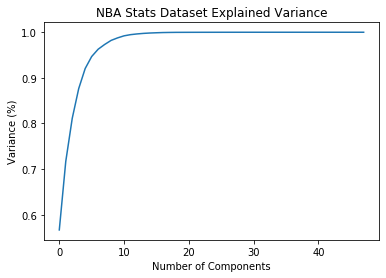

In [25]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('NBA Stats Dataset Explained Variance')
plt.show()

In [26]:
data_mean = np.mean(data_rescaled)

In [27]:
data_center = data_rescaled - data_mean

In [28]:
cov_matrix = np.cov(data_center)

In [29]:
eigenval, eigenvec = np.linalg.eig(cov_matrix)

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


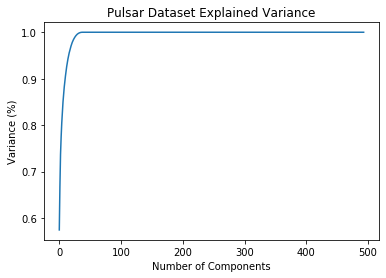

In [30]:
significance = [np.abs(i)/np.sum(eigenval) for i in eigenval]
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(significance))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [32]:
pca = PCA(n_components=7)
fit = pca.fit(stats_ony).transform(stats_ony)
print(pca.explained_variance_ratio_)

[0.56668364 0.150191   0.09449993 0.06518598 0.04396785 0.0262308
 0.01600987]


In [35]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(data_rescaled)

In [41]:
silhouette = []

for n_clusters in range(2, 21):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 99)
    cluster_labels = kmeans.fit_predict(rescaled_no_dups)
    
    centers = kmeans.cluster_centers_

    score = silhouette_score(x3, cluster_labels)
    silhouette.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.19583795884338306
For n_clusters = 3, silhouette score is 0.1424727866533827
For n_clusters = 4, silhouette score is 0.1090004227555243
For n_clusters = 5, silhouette score is 0.10462713480418533
For n_clusters = 6, silhouette score is 0.09790694490826642
For n_clusters = 7, silhouette score is 0.09824831259027267
For n_clusters = 8, silhouette score is 0.10673488085747049
For n_clusters = 9, silhouette score is 0.09983498106124038
For n_clusters = 10, silhouette score is 0.10059542862691298
For n_clusters = 11, silhouette score is 0.08836493100833044
For n_clusters = 12, silhouette score is 0.10073550816359396
For n_clusters = 13, silhouette score is 0.11883279757286772
For n_clusters = 14, silhouette score is 0.1014586647166426
For n_clusters = 15, silhouette score is 0.10857568421731675
For n_clusters = 16, silhouette score is 0.10654783634305452
For n_clusters = 17, silhouette score is 0.10124107898979064
For n_clusters = 18, silhouette sco

In [162]:
silhouette = []

for n_clusters in range(2, 21):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 99)
    cluster_labels = kmeans.fit_predict(rescaled_no_dups)
    
    centers = kmeans.cluster_centers_

    score = silhouette_score(rescaled_no_dups, cluster_labels)
    silhouette.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.1770427918805728
For n_clusters = 3, silhouette score is 0.1493772331726132
For n_clusters = 4, silhouette score is 0.11432047883032748
For n_clusters = 5, silhouette score is 0.10136046460807023
For n_clusters = 6, silhouette score is 0.10063558660546588
For n_clusters = 7, silhouette score is 0.09721267868650939
For n_clusters = 8, silhouette score is 0.0935233735858098
For n_clusters = 9, silhouette score is 0.08359091525011311
For n_clusters = 10, silhouette score is 0.08637053238878115
For n_clusters = 11, silhouette score is 0.08892161966347249
For n_clusters = 12, silhouette score is 0.08622018305314681
For n_clusters = 13, silhouette score is 0.08186398177544152
For n_clusters = 14, silhouette score is 0.07571848068020885
For n_clusters = 15, silhouette score is 0.07759534096435523
For n_clusters = 16, silhouette score is 0.07190505824732367
For n_clusters = 17, silhouette score is 0.06941627773738748
For n_clusters = 18, silhouette sco

In [163]:
silhouette_diff = []

for i in range(1, len(silhouette)):
    improvement = 1 - ((1 - silhouette[i]) / (1 - silhouette[i - 1]))
    silhouette_diff.append(improvement)
    print("For n_cluster = {}, percent improvement = {}".format(i + 2, improvement))

For n_cluster = 3, percent improvement = -0.03361725061158327
For n_cluster = 4, percent improvement = -0.04121304497061451
For n_cluster = 5, percent improvement = -0.014632848465482962
For n_cluster = 6, percent improvement = -0.0008066393409769113
For n_cluster = 7, percent improvement = -0.00380591878884462
For n_cluster = 8, percent improvement = -0.004086571680395279
For n_cluster = 9, percent improvement = -0.010957213949340572
For n_cluster = 10, percent improvement = 0.003033161919631877
For n_cluster = 11, percent improvement = 0.002792255903655838
For n_cluster = 12, percent improvement = -0.002965097919816584
For n_cluster = 13, percent improvement = -0.004767232977699543
For n_cluster = 14, percent improvement = -0.006693453881829514
For n_cluster = 15, percent improvement = 0.002030615396841129
For n_cluster = 16, percent improvement = -0.006168965715091623
For n_cluster = 17, percent improvement = -0.0026816012004506895
For n_cluster = 18, percent improvement = -0.002800

Text(0.5, 0.98, 'Finding the right number of clusters')

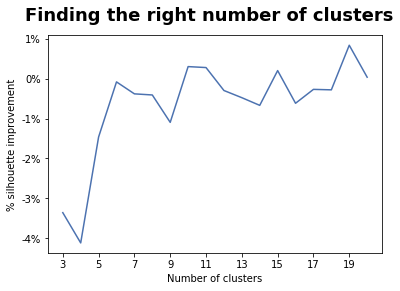

In [164]:
plt.style.use('seaborn-deep')

silhouette_imp_fig, ax = plt.subplots()

ax.plot(range(3, 21), silhouette_diff)

ax.set_xlabel('Number of clusters')
ax.set_ylabel('% silhouette improvement')

ax.set_xticks(np.arange(3, 21, 2.0))

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

silhouette_imp_fig.suptitle("Finding the right number of clusters", weight = 'bold', size = 18)

In [109]:
kmeans = KMeans(n_clusters = 10)

kmeans.fit(data_rescaled_X)

y_kmeans = kmeans.predict(data_rescaled_X)
kmeans.fit(data_rescaled_X)

y_kmeans = kmeans.predict(data_rescaled_X)

In [151]:
nba_no_dups['cluster'] = y_kmeans

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [168]:
nba_no_dups[nba_no_dups['cluster'] ==1]

,name,player_id,age,season,team,MP,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,FG%,Avg_shot_dist,%_2point_attempts,%_FGA_0-3_dist,%_FGA_3-10_dist,%_FGA_10-16_dist,%_FGA_16-3pt_dist,%_3point_attempts,%FG_2point,%_FG_0-3_dist,%_FG_3-10_dist,%_FG_10-16_dist,%_FG_10-16_dist.1,3pt%,assisted_2pters,FG%_dunk_attempts,made_dunks,assisted_3pt%,%_corner_3pters,%_corner_3_made,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,predator_offense,predator_defense,predator_total,pace_impact,cluster
7,OG Anunoby,anunoog01,22,2020,TOR,1574,0.147,4.1,15.1,9.7,7.5,1.9,2.2,12.1,14.6,1.3,2.6,3.8,0.117,0.499,11.7,0.593,0.453,0.109,0.020,0.011,0.407,0.592,0.683,0.300,0.333,0.200,0.364,0.665,0.153,67,0.941,0.497,0.355,-2.055293,1.789890,-0.265403,1.652727,-1.160509,0.492217,-1.426298,1.236302,-0.189997,2.107256,2.107256,-1.315347,1.538165,0.222818,0.023965,1
29,Aron Baynes,baynear01,33,2020,PHO,756,0.205,7.7,20.3,13.9,12.6,0.4,2.2,10.7,20.5,1.1,0.6,1.7,0.110,0.493,13.0,0.576,0.342,0.178,0.036,0.020,0.424,0.611,0.663,0.611,0.364,0.167,0.333,0.748,0.089,25,1.000,0.132,0.176,-1.092021,-0.153121,-1.245141,-0.111452,-1.446760,-1.558212,-0.952023,-0.415222,-1.367245,0.552574,0.552574,-1.321977,0.447982,-0.873995,0.426155,1
57,Isaac Bonga,bongais01,20,2020,WAS,850,0.363,6.3,13.8,9.9,8.0,1.8,1.8,15.3,10.5,1.2,0.4,1.6,0.089,0.534,9.5,0.724,0.491,0.172,0.043,0.018,0.276,0.585,0.663,0.500,0.143,0.333,0.400,0.580,0.049,6,1.000,0.422,0.526,-0.079932,0.842162,0.762230,-0.026301,6.104985,6.078684,-0.091346,2.099899,2.008554,2.116548,2.116548,-0.693551,1.544512,0.850961,0.210084,1
62,Mikal Bridges,bridgmi01,23,2020,PHO,1413,0.273,3.6,13.5,8.4,8.5,2.7,1.9,12.7,12.6,1.5,1.7,3.2,0.109,0.503,12.0,0.633,0.414,0.118,0.071,0.030,0.367,0.603,0.721,0.350,0.333,0.600,0.331,0.752,0.118,34,1.000,0.460,0.386,-0.134839,1.520047,1.385207,-0.604512,2.715053,2.110541,-0.253501,1.877448,1.623947,3.276929,3.276929,-0.853888,2.328586,1.474698,0.169045,1
90,Wilson Chandler,chandwi01,32,2020,BRK,517,0.143,1.6,19.5,10.8,8.4,1.4,1.3,16.0,13.6,0.0,0.7,0.7,0.066,0.421,18.4,0.372,0.103,0.172,0.048,0.048,0.628,0.611,0.733,0.560,0.286,0.857,0.308,0.485,0.007,1,1.000,0.220,0.450,-1.453569,2.196484,0.742915,-5.137938,-0.178127,-5.316065,-2.310795,1.808900,-0.501896,0.654517,0.654517,-2.043306,1.291805,-0.751501,-0.242107,1
107,Pat Connaughton,connapa01,27,2020,MIL,914,0.117,5.1,17.8,11.8,10.7,0.7,2.5,15.1,11.9,0.6,1.7,2.3,0.122,0.452,14.9,0.489,0.385,0.068,0.014,0.023,0.511,0.593,0.706,0.267,0.000,0.000,0.319,0.734,0.113,24,0.944,0.106,0.417,-1.496439,1.178402,-0.318037,-1.889463,-2.148678,-4.038142,-1.699286,0.423533,-1.275753,0.709386,0.709386,-1.934353,-0.199853,-2.134206,-0.524079,1
121,Torrey Craig,craigto01,29,2020,DEN,760,0.177,6.1,14.6,10.3,4.9,1.0,3.3,9.2,11.8,0.6,0.9,1.5,0.095,0.450,15.7,0.478,0.317,0.089,0.033,0.039,0.522,0.593,0.719,0.375,0.167,0.429,0.319,0.667,0.050,7,0.967,0.383,0.306,-0.540449,0.048139,-0.492310,-1.416961,-2.565224,-3.982185,-0.757456,-0.524617,-1.282073,0.577480,0.577480,-1.205692,-0.373949,-1.579642,-0.648600,1
135,Dewayne Dedmon,dedmode01,30,2020,SAC,619,0.157,8.3,26.3,17.0,3.9,1.4,5.4,19.8,18.4,-0.8,0.8,0.0,0.003,0.404,13.7,0.585,0.304,0.181,0.035,0.064,0.415,0.550,0.692,0.355,0.500,0.455,0.197,0.709,0.129,19,1.000,0.141,0.300,-5.943987,2.831654,-3.112333,-2.171232,1.246888,-0.924345,-5.503951,2.689323,-2.814628,-0.017863,-0.017863,-4.177965,2.060373,-2.117592,0.140211,1
169,James Ennis III,ennisja01,29,2020,ORL,806,0.285,7.0,14.2,10.6,7.3,1.4,1.5,11.1,15.9,0.9,1.0,1.9,0.113,0.442,14.5,0.531,0.381,0.093,0.022,0.035,0.469,0.525,0.651,0.190,0.000,0.375,0.349,0.698,0.093,17,1.000,0.415,0.432,-2.602876,1.845612,-0.757264,-3.701828,5.237086,1.535258,-2.956709,2.620239,-0.336470,0.062892,0.062892,-6.637091,0.669443,-5.967648,0.147935,1
181,Dorian Finney-Smith,finnedo01,26,2020,DAL,1635,0.208,7.3,12.4,9.9,6.8,1.1,1.6,11

In [169]:
nba_no_dups[nba_no_dups['cluster'] ==1]

,name,player_id,age,season,team,MP,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,FG%,Avg_shot_dist,%_2point_attempts,%_FGA_0-3_dist,%_FGA_3-10_dist,%_FGA_10-16_dist,%_FGA_16-3pt_dist,%_3point_attempts,%FG_2point,%_FG_0-3_dist,%_FG_3-10_dist,%_FG_10-16_dist,%_FG_10-16_dist.1,3pt%,assisted_2pters,FG%_dunk_attempts,made_dunks,assisted_3pt%,%_corner_3pters,%_corner_3_made,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,predator_offense,predator_defense,predator_total,pace_impact,cluster
7,OG Anunoby,anunoog01,22,2020,TOR,1574,0.147,4.1,15.1,9.7,7.5,1.9,2.2,12.1,14.6,1.3,2.6,3.8,0.117,0.499,11.7,0.593,0.453,0.109,0.020,0.011,0.407,0.592,0.683,0.300,0.333,0.200,0.364,0.665,0.153,67,0.941,0.497,0.355,-2.055293,1.789890,-0.265403,1.652727,-1.160509,0.492217,-1.426298,1.236302,-0.189997,2.107256,2.107256,-1.315347,1.538165,0.222818,0.023965,1
29,Aron Baynes,baynear01,33,2020,PHO,756,0.205,7.7,20.3,13.9,12.6,0.4,2.2,10.7,20.5,1.1,0.6,1.7,0.110,0.493,13.0,0.576,0.342,0.178,0.036,0.020,0.424,0.611,0.663,0.611,0.364,0.167,0.333,0.748,0.089,25,1.000,0.132,0.176,-1.092021,-0.153121,-1.245141,-0.111452,-1.446760,-1.558212,-0.952023,-0.415222,-1.367245,0.552574,0.552574,-1.321977,0.447982,-0.873995,0.426155,1
57,Isaac Bonga,bongais01,20,2020,WAS,850,0.363,6.3,13.8,9.9,8.0,1.8,1.8,15.3,10.5,1.2,0.4,1.6,0.089,0.534,9.5,0.724,0.491,0.172,0.043,0.018,0.276,0.585,0.663,0.500,0.143,0.333,0.400,0.580,0.049,6,1.000,0.422,0.526,-0.079932,0.842162,0.762230,-0.026301,6.104985,6.078684,-0.091346,2.099899,2.008554,2.116548,2.116548,-0.693551,1.544512,0.850961,0.210084,1
62,Mikal Bridges,bridgmi01,23,2020,PHO,1413,0.273,3.6,13.5,8.4,8.5,2.7,1.9,12.7,12.6,1.5,1.7,3.2,0.109,0.503,12.0,0.633,0.414,0.118,0.071,0.030,0.367,0.603,0.721,0.350,0.333,0.600,0.331,0.752,0.118,34,1.000,0.460,0.386,-0.134839,1.520047,1.385207,-0.604512,2.715053,2.110541,-0.253501,1.877448,1.623947,3.276929,3.276929,-0.853888,2.328586,1.474698,0.169045,1
90,Wilson Chandler,chandwi01,32,2020,BRK,517,0.143,1.6,19.5,10.8,8.4,1.4,1.3,16.0,13.6,0.0,0.7,0.7,0.066,0.421,18.4,0.372,0.103,0.172,0.048,0.048,0.628,0.611,0.733,0.560,0.286,0.857,0.308,0.485,0.007,1,1.000,0.220,0.450,-1.453569,2.196484,0.742915,-5.137938,-0.178127,-5.316065,-2.310795,1.808900,-0.501896,0.654517,0.654517,-2.043306,1.291805,-0.751501,-0.242107,1
107,Pat Connaughton,connapa01,27,2020,MIL,914,0.117,5.1,17.8,11.8,10.7,0.7,2.5,15.1,11.9,0.6,1.7,2.3,0.122,0.452,14.9,0.489,0.385,0.068,0.014,0.023,0.511,0.593,0.706,0.267,0.000,0.000,0.319,0.734,0.113,24,0.944,0.106,0.417,-1.496439,1.178402,-0.318037,-1.889463,-2.148678,-4.038142,-1.699286,0.423533,-1.275753,0.709386,0.709386,-1.934353,-0.199853,-2.134206,-0.524079,1
121,Torrey Craig,craigto01,29,2020,DEN,760,0.177,6.1,14.6,10.3,4.9,1.0,3.3,9.2,11.8,0.6,0.9,1.5,0.095,0.450,15.7,0.478,0.317,0.089,0.033,0.039,0.522,0.593,0.719,0.375,0.167,0.429,0.319,0.667,0.050,7,0.967,0.383,0.306,-0.540449,0.048139,-0.492310,-1.416961,-2.565224,-3.982185,-0.757456,-0.524617,-1.282073,0.577480,0.577480,-1.205692,-0.373949,-1.579642,-0.648600,1
135,Dewayne Dedmon,dedmode01,30,2020,SAC,619,0.157,8.3,26.3,17.0,3.9,1.4,5.4,19.8,18.4,-0.8,0.8,0.0,0.003,0.404,13.7,0.585,0.304,0.181,0.035,0.064,0.415,0.550,0.692,0.355,0.500,0.455,0.197,0.709,0.129,19,1.000,0.141,0.300,-5.943987,2.831654,-3.112333,-2.171232,1.246888,-0.924345,-5.503951,2.689323,-2.814628,-0.017863,-0.017863,-4.177965,2.060373,-2.117592,0.140211,1
169,James Ennis III,ennisja01,29,2020,ORL,806,0.285,7.0,14.2,10.6,7.3,1.4,1.5,11.1,15.9,0.9,1.0,1.9,0.113,0.442,14.5,0.531,0.381,0.093,0.022,0.035,0.469,0.525,0.651,0.190,0.000,0.375,0.349,0.698,0.093,17,1.000,0.415,0.432,-2.602876,1.845612,-0.757264,-3.701828,5.237086,1.535258,-2.956709,2.620239,-0.336470,0.062892,0.062892,-6.637091,0.669443,-5.967648,0.147935,1
181,Dorian Finney-Smith,finnedo01,26,2020,DAL,1635,0.208,7.3,12.4,9.9,6.8,1.1,1.6,11

In [171]:
nba_no_dups.to_csv('../data/clusters_w_all_data_2020.csv')